# Bagging - Bootstrap Aggregation
## High variance -> Overfitting

- No funciona en modelos lineales como la regresión logistica o lineal por ejemplo
- Usado en arboles (Random Forests por ejemplo)
- Modelos con alta varianza y bajo bias que se combinan para disminuirla
- Se puede paralelizar
- los resultados se promedias o se decide la mayoría (Unweighted sum)

### Bootstrap
- Se muestrea con reemplazo
- Se suele usar la misma cantidad
- Estadísticamente un 66% de las observaciones quedan en cada muestra y el resto son repetidas

A pesar de que cada predictor memoriza, al no tener todas las observaciones, no lo puede hacer con todas

In [1]:
%load_ext autoreload
%autoreload 2
from sklearn.linear_model import LogisticRegression
import reg_helper as RHelper
import numpy as np
from functools import partial
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [2]:
folder = 'data/'
X_train = np.load(folder+'X_train.npy')
X_test = np.load(folder+'X_test.npy')
y_train = np.load(folder+'y_train.npy') 
y_test = np.load(folder+'y_test.npy')

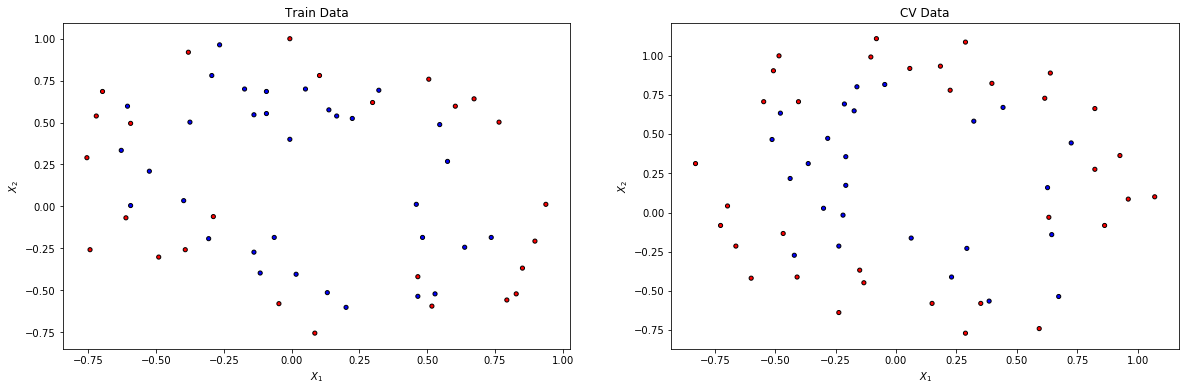

In [3]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
RHelper.plot_boundaries(X_train, y_train, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, ax=ax2)
ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

In [4]:
# Agregamos FE (Polinomios)
degree = 6
X_train_degree = RHelper.get_polynimial_set(X_train, degree=degree)
X_test_degree = RHelper.get_polynimial_set(X_test, degree=degree)

In [5]:
X_train_degree.shape

(59, 28)

In [6]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
lr_clf = LogisticRegression(solver='lbfgs', C=10000000000, fit_intercept=False,  max_iter=2000)
lr_clf.fit(X_train_degree, y_train)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=2000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
score_train = lr_clf.score(X_train_degree, y_train)
score_test = lr_clf.score(X_test_degree, y_test)

print(score_train, score_test)

1.0 0.6101694915254238


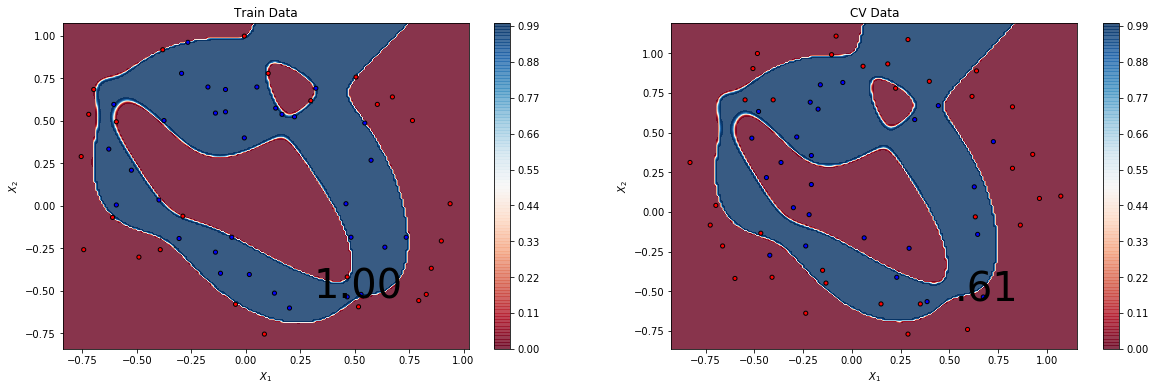

In [9]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
pred_type = 'proba'
RHelper.plot_boundaries(X_train, y_train, score_train, lr_clf.predict_proba, degree=degree, mesh_res=200, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, score_test, lr_clf.predict_proba, degree=degree, mesh_res=200, ax=ax2)
ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [10]:
# Sin regularización, y sin intercept por que usamos el vector de all ones
# Defino el modelo
lr_clf = LogisticRegression(solver='lbfgs', C=10000000000, fit_intercept=False,  max_iter=2000)

# Cantidad de instancias de la regresión logística: 100
bagg_clf = BaggingClassifier(lr_clf, n_estimators=100, 
                             max_samples=1.0, max_features=1.0, oob_score=True,
                             bootstrap=True, bootstrap_features=False, random_state=1)

bagg_clf.fit(X_train_degree, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=10000000000,
                                                    class_weight=None,
                                                    dual=False,
                                                    fit_intercept=False,
                                                    intercept_scaling=1,
                                                    l1_ratio=None,
                                                    max_iter=2000,
                                                    multi_class='warn',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
    

In [11]:
score_train = bagg_clf.score(X_train_degree, y_train)
score_test = bagg_clf.score(X_test_degree, y_test)

In [12]:
score_train

1.0

In [13]:
score_test

0.7966101694915254

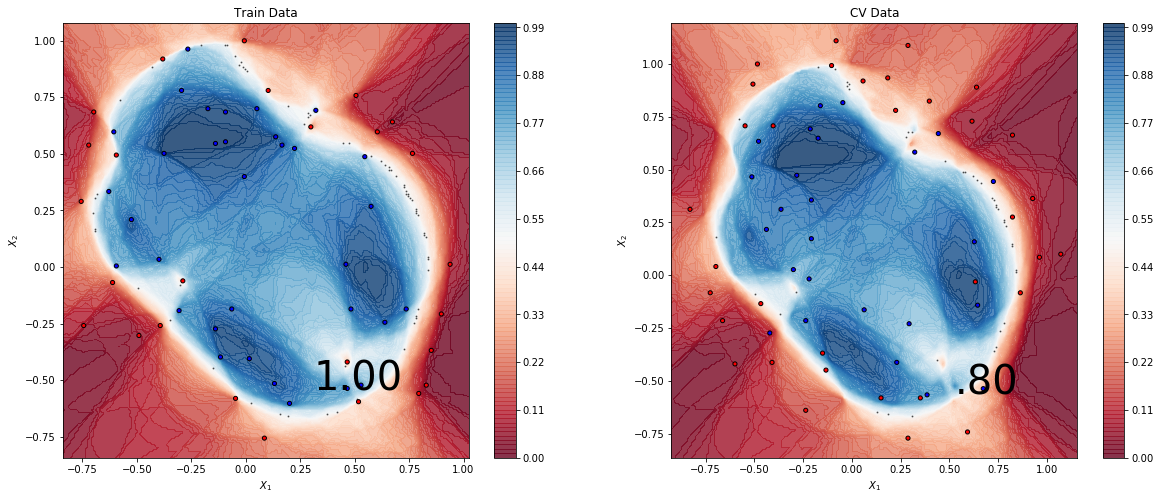

In [14]:
# Graficamos probabilidades en el plano de la combinación de todos los clasificadores
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
pred_type = 'proba'
RHelper.plot_boundaries(X_train, y_train, score_train, bagg_clf.predict_proba, degree=degree, mesh_res=200, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, score_test, bagg_clf.predict_proba, degree=degree, mesh_res=200, ax=ax2)
ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

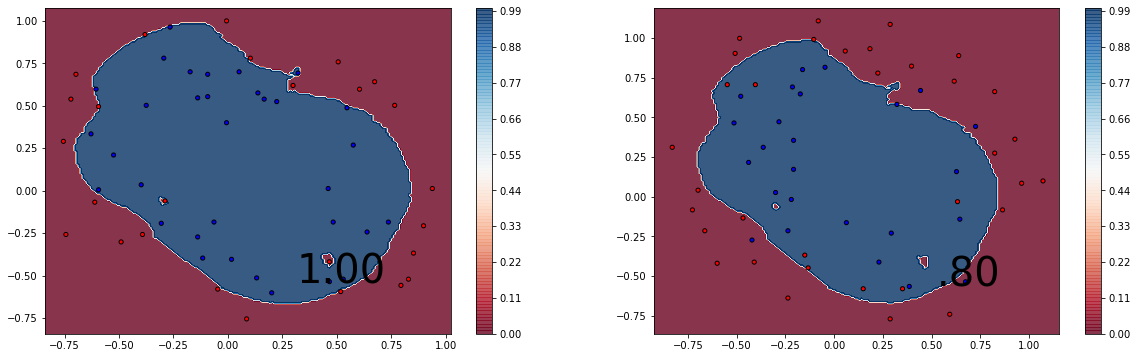

In [15]:
# Graficamos clases en el plano
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
pred_type = 'proba'
RHelper.plot_boundaries(X_train, y_train, score_train, bagg_clf.predict, degree=degree, mesh_res=200, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, score_test, bagg_clf.predict, degree=degree, mesh_res=200, ax=ax2)

In [16]:
bagg_clf.estimators_[:5]

[LogisticRegression(C=10000000000, class_weight=None, dual=False,
                    fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                    max_iter=2000, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=1028862084, solver='lbfgs', tol=0.0001,
                    verbose=0, warm_start=False),
 LogisticRegression(C=10000000000, class_weight=None, dual=False,
                    fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                    max_iter=2000, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=870353631, solver='lbfgs', tol=0.0001,
                    verbose=0, warm_start=False),
 LogisticRegression(C=10000000000, class_weight=None, dual=False,
                    fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                    max_iter=2000, multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=788373214, solver='lbfgs', tol=0.0001,
        

In [17]:
bagg_clf.estimators_[0]

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=2000, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1028862084, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [18]:
bagg_clf.estimators_samples_[0]

array([ 4, 28, 10, 23, 18, 57, 54, 44, 49, 27, 45, 36, 10, 52, 24, 43,  2,
       20, 39,  8,  1, 50, 29, 51, 53, 18, 28, 30, 36, 31, 37, 29, 13, 39,
       35, 11, 35, 19, 17, 56,  5, 33, 49, 25, 22, 47, 39, 35, 37, 28, 38,
        3, 24,  6,  1,  3, 17, 11, 40])

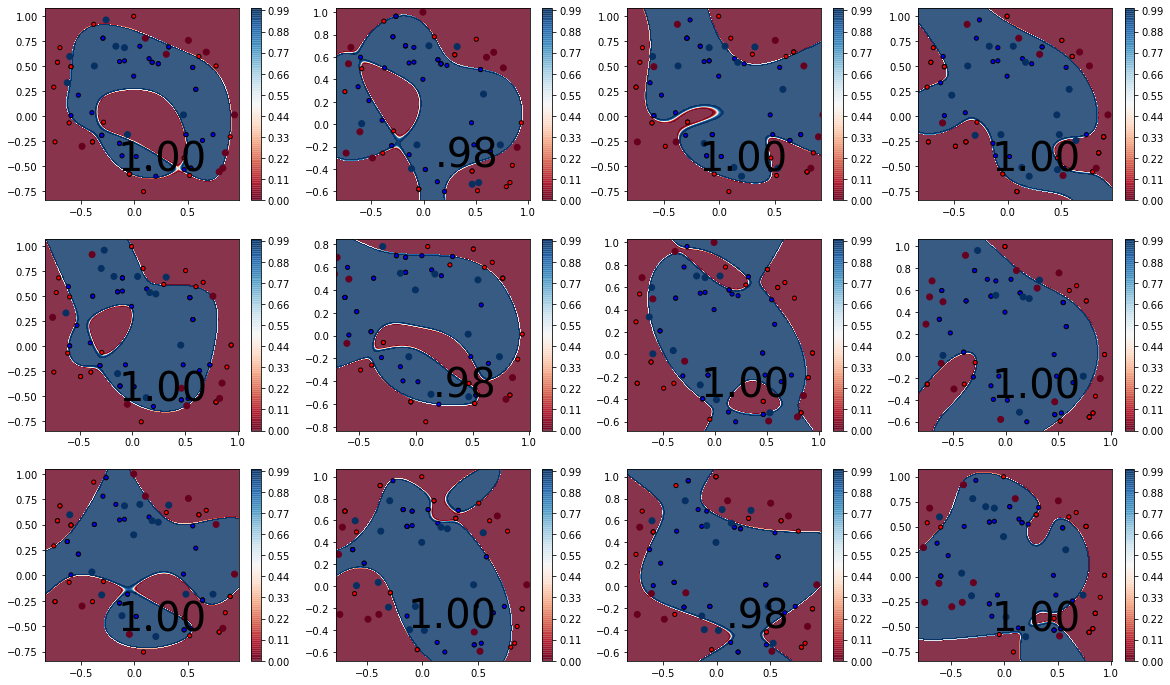

In [19]:
f, ax = plt.subplots(3, 4, figsize=(20,12))
ax = ax.reshape(-1)
for clf_i in range(12):
    idxs = bagg_clf.estimators_samples_[clf_i]
    idxs_not_used = list(set(range(len(y_train)))-set(idxs))
    score_train = bagg_clf.estimators_[clf_i].score(X_train_degree[idxs], y_train[idxs])
    score_test = bagg_clf.estimators_[clf_i].score(X_test_degree, y_test)
    RHelper.plot_boundaries(X_train[idxs], y_train[idxs], score_train, bagg_clf.estimators_[clf_i].predict_proba, 
                            degree=degree, mesh_res=200, ax=ax[clf_i])
    ax[clf_i].scatter(X_train[idxs_not_used][:,0], X_train[idxs_not_used][:,1], c=1*y_train[idxs_not_used], cmap=plt.cm.RdBu)

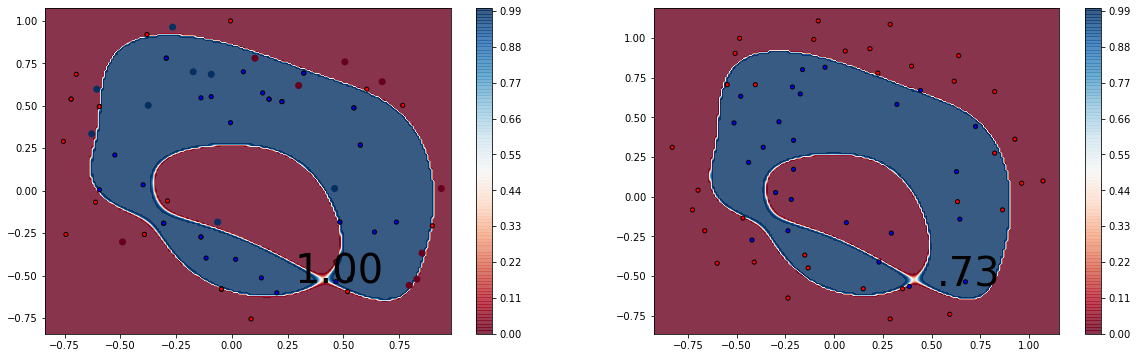

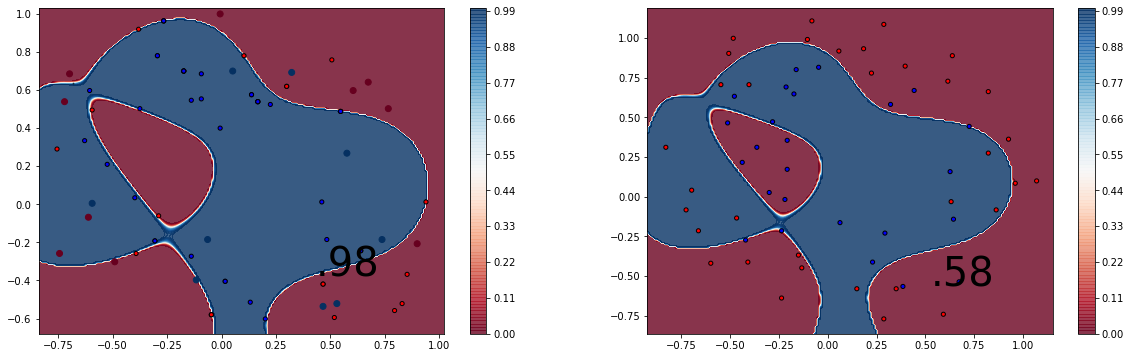

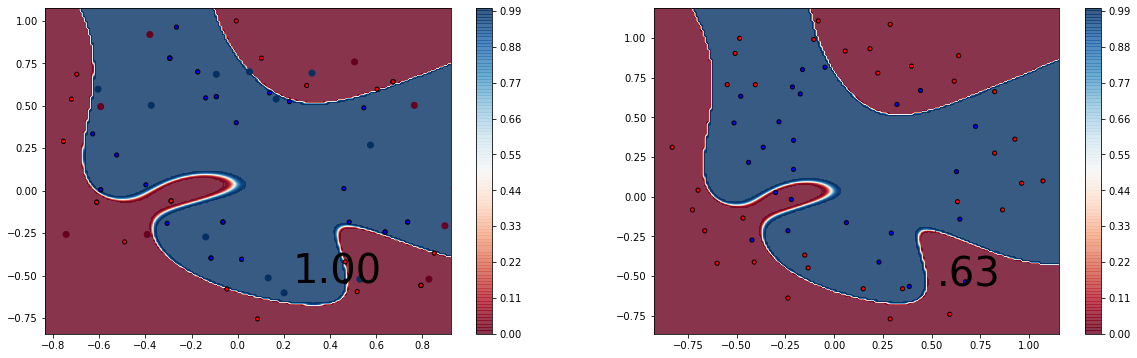

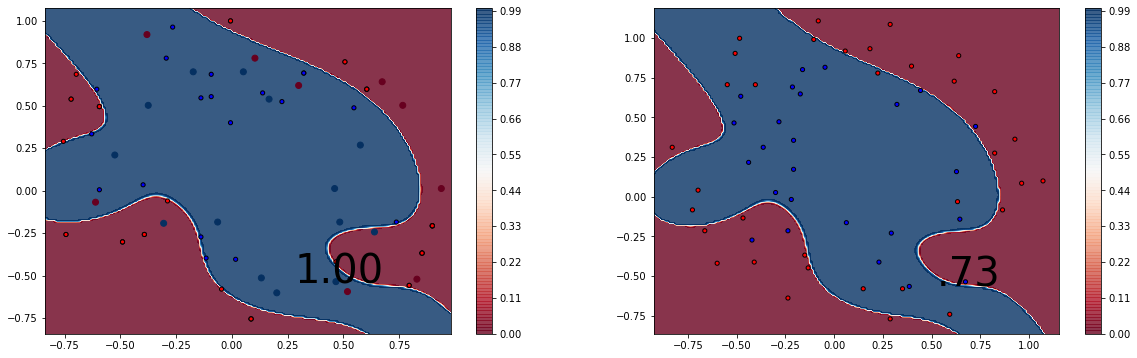

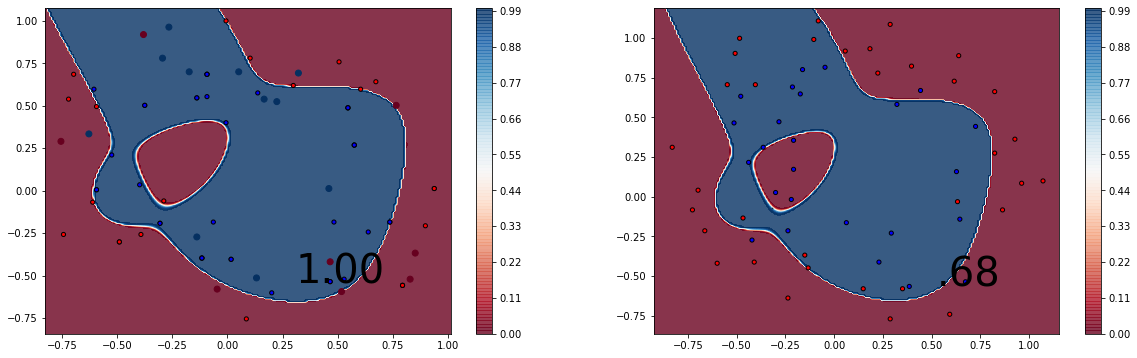

In [20]:
for clf_i in range(5):
    idxs = bagg_clf.estimators_samples_[clf_i]
    idxs_not_used = list(set(range(len(y_train)))-set(idxs))
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
    score_train = bagg_clf.estimators_[clf_i].score(X_train_degree[idxs], y_train[idxs])
    score_test = bagg_clf.estimators_[clf_i].score(X_test_degree, y_test)
    RHelper.plot_boundaries(X_train[idxs], y_train[idxs], score_train, bagg_clf.estimators_[clf_i].predict_proba, 
                            degree=degree, mesh_res=200, ax=ax1)
    RHelper.plot_boundaries(X_test, y_test, score_test, bagg_clf.estimators_[clf_i].predict_proba, 
                            degree=degree, mesh_res=200, ax=ax2)
    ax1.scatter(X_train[idxs_not_used][:,0], X_train[idxs_not_used][:,1], c=1*y_train[idxs_not_used], cmap=plt.cm.RdBu)

In [21]:
bagg_clf.estimators_[2].coef_

array([[ 3.50435174e+00,  9.68471381e+01, -1.31141626e+02,
        -5.43857972e+01,  1.34625187e+02,  1.78581606e+03,
        -4.35697903e+02,  3.50005617e+03, -8.99706789e+02,
         2.02129582e+01,  2.07039131e+03,  1.75668513e+03,
        -3.94396792e+03, -4.94213433e+03, -4.08301837e+03,
         2.70901185e+03, -5.69392654e+02,  3.20554927e+03,
        -4.71738112e+03,  1.01923557e+03,  2.32670614e+03,
        -1.56953143e+03,  2.14762890e+03, -3.21360081e+03,
         1.27423916e+03, -7.34542058e+02, -4.58308220e+03,
        -6.55290072e+02]])

In [22]:
avg_coefs = 0
for clf in bagg_clf.estimators_:
    avg_coefs = avg_coefs + clf.coef_
avg_coefs = avg_coefs / len(y_train)

In [23]:
avg_model = LogisticRegression()
avg_model.coef_ = avg_coefs
avg_model.intercept_ = np.array([0.])
avg_model.classes_ = np.array([0., 1.])

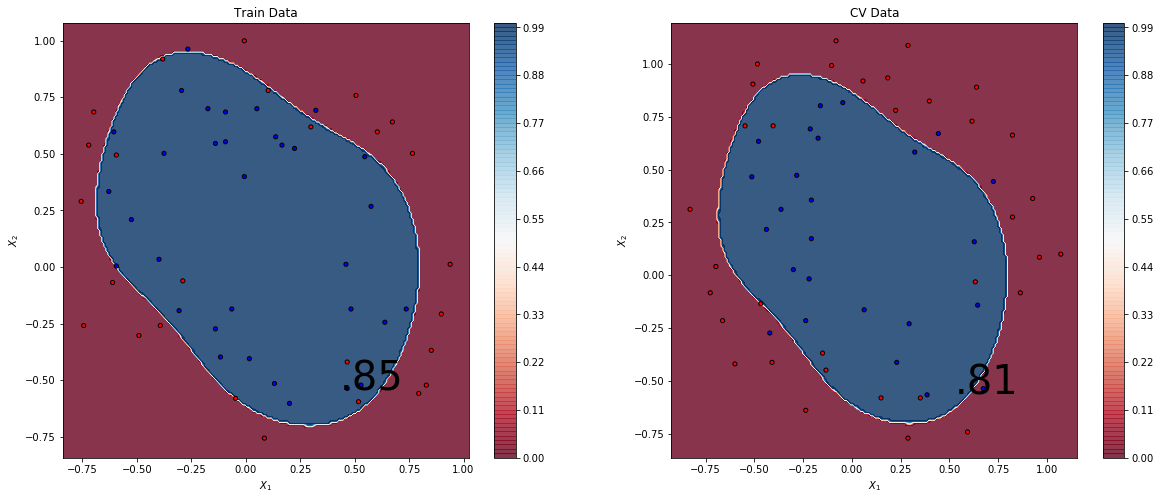

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
score_train = avg_model.score(X_train_degree, y_train)
score_test = avg_model.score(X_test_degree, y_test)
RHelper.plot_boundaries(X_train, y_train, score_train, avg_model.predict_proba, degree=degree, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, score_test, avg_model.predict_proba, degree=degree, ax=ax2)

ax1.set_title('Train Data')
ax2.set_title('CV Data')
ax1.set_xlabel('$X_1$')
ax1.set_ylabel('$X_2$')
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.show()

In [72]:
avg_model.predict_proba(X_train_degree)

array([[1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 1.29179602e-127],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.09644423e-076],
       [1.00000000e+000, 2.78460736e-117],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 0.00000000e+000],
       [1.00000000e+000, 1.86168378e-070],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [0.00000000e+000, 1.00000000e+000],
       [1.0

# Sin usar sklearn

In [ ]:
np.random.seed(42)
B = 100
degree = 6
models = []
for i in range(B):
    N = len(X_train)
    indexes = np.random.choice(list(range(N)), N, replace=True)
    if i<10: 
        plot_it = True 
    else: 
        plot_it = False
    model = RHelper.fit_and_get_regions(X_train[indexes], y_train[indexes], 
                                              X_test, y_test, plot_it=plot_it,
                                              degree=degree, lambd = 0, return_model=True)
    models.append(model)

In [5]:
coef_avg = 0
for model in models:
    coef_avg = coef_avg + model.coef_
coef_avg = coef_avg/B

In [6]:
coef_avg

array([[  414.56882859,   583.1735535 ,  -111.87753898,   180.30131362,
        -1504.89987589,   331.59524076,   321.81374984,  2471.04441565,
         -338.17028237,   453.70593999,   420.66094186,  1487.04564588,
        -6023.0084885 , -1784.37149669, -1326.55101824,  -731.7749699 ,
        -1689.47964384,  1010.48403838,  -755.75838722,   713.69675588,
         2056.77520525, -4274.89066043,  -170.10013517, -3272.48203772,
         1073.89844417,  -720.97483303,  -957.6947223 , -2698.64038191]])

In [9]:
X_train_degree = RHelper.get_polynimial_set(X_train, degree=degree)
X_test_degree = RHelper.get_polynimial_set(X_test, degree=degree)

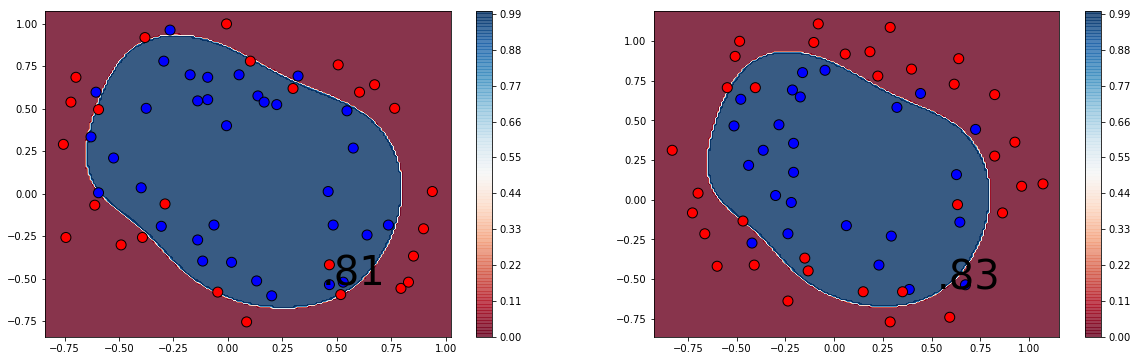

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
score_train = avg_model.score(X_train_degree, y_train)
score_test = avg_model.score(X_test_degree, y_test)
RHelper.plot_boundaries(X_train, y_train, score_train, avg_model.predict_proba, degree=degree, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, score_test, avg_model.predict_proba, degree=degree, ax=ax2)

In [11]:
#((models[0].predict_proba(X_train_degree))>0.5)*1

In [12]:
def ensemble_predict(models, pred_type, X, y=None):
    # pred_type: ['mayority', 'proba', 'predict']
    predictions_avg = 0
    for model in models:
        if pred_type == 'mayority':
            predictions_avg = predictions_avg + 1*((model.predict_proba(X))>0.5)
        else:
            predictions_avg = predictions_avg + model.predict_proba(X)
    predictions_avg = predictions_avg/len(models)
    if pred_type == 'proba':
        return predictions_avg
    else:
        return predictions_avg>0.5 

In [13]:
# ensemble_preds_train

In [14]:
pred_type = 'mayority'
ensemble_preds_train = ensemble_predict(models, pred_type, X_train_degree,)
ensemble_preds_test = ensemble_predict(models, pred_type, X_test_degree,)
score_train = ((y_train == 1) == (ensemble_preds_train[:,1]>0.5)).sum()/len(y_train)
score_test = ((y_test == 1) == (ensemble_preds_test[:,1]>0.5)).sum()/len(y_test)

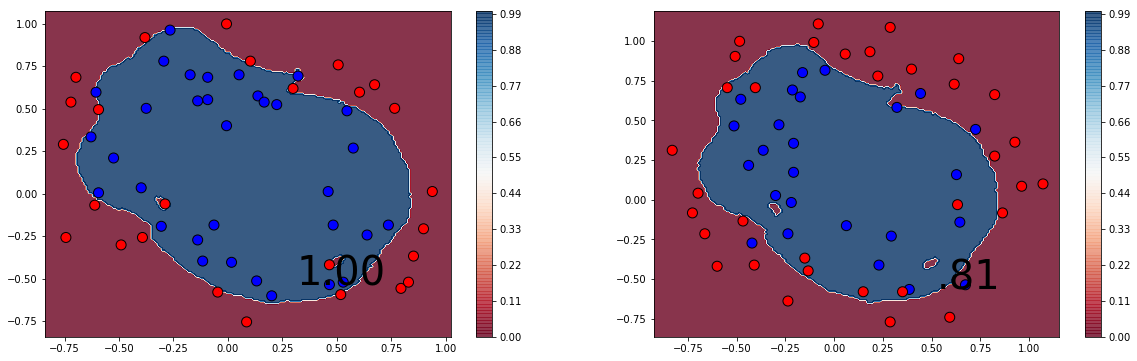

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))

RHelper.plot_boundaries(X_train, y_train, score_train, partial(ensemble_predict, models, pred_type), degree=degree, mesh_res=200, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, score_test, partial(ensemble_predict, models, pred_type), degree=degree, mesh_res=200, ax=ax2)

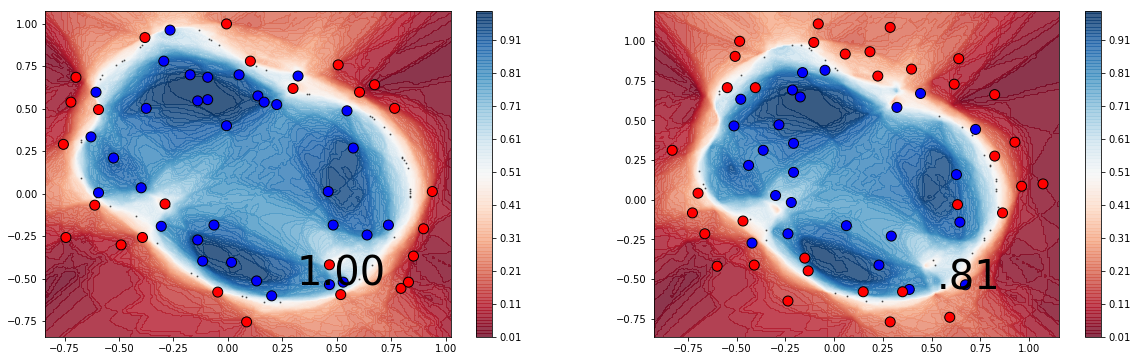

In [16]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
pred_type = 'proba'
RHelper.plot_boundaries(X_train, y_train, score_train, partial(ensemble_predict, models, pred_type), degree=degree, mesh_res=200, ax=ax1)
RHelper.plot_boundaries(X_test, y_test, score_test, partial(ensemble_predict, models, pred_type), degree=degree, mesh_res=200, ax=ax2)